In [39]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Description

First we import the data and examine the data at a high level to see what we're working with.

In [40]:
df = pd.read_csv('data/loans_full_schema.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

Immediately we see that we have 10 columns that contain null values
- ``emp_title``
- ``emp_length``
- ``debt_to_income``
- ``annual_income_joint``
- ``verification_income_joint``
- ``debt_to_income_joint``
- ``months_since_last_delinq``
- ``months_since_90d_late``
- ``months_since_last_credit_inquiry``
- ``num_accounts_120d_past_due``


This will need to be addressed before we get to the model-building phase of this analysis.

# Visualizations 

## Interest Rate Distribution

We'll be attempting to predict the ``interest_rate`` later, so let's first look at a histogram of the distribution.

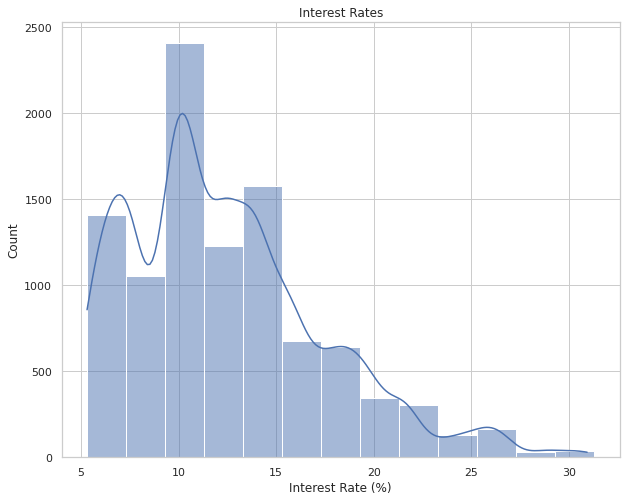

In [41]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=df, x='interest_rate', kde=True, binwidth=2)
plt.title('Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.show()

We see the highest concentration of interest rates around 10% with a big dropoff starting around 12%. 

## Interest Rate by Grade

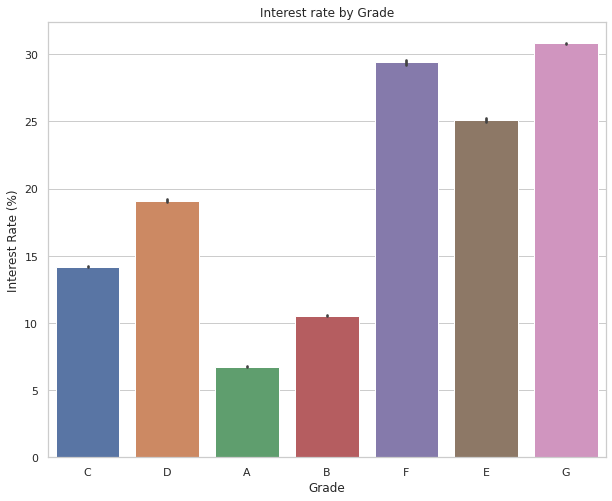

In [42]:
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df, x='grade', y='interest_rate')
plt.title('Interest rate by Grade')
plt.xlabel('Grade')
plt.ylabel('Interest Rate (%)')
plt.show()

Hardly surprising, lower grades have higher interest rates.

## Loan Amount Distribution and Status

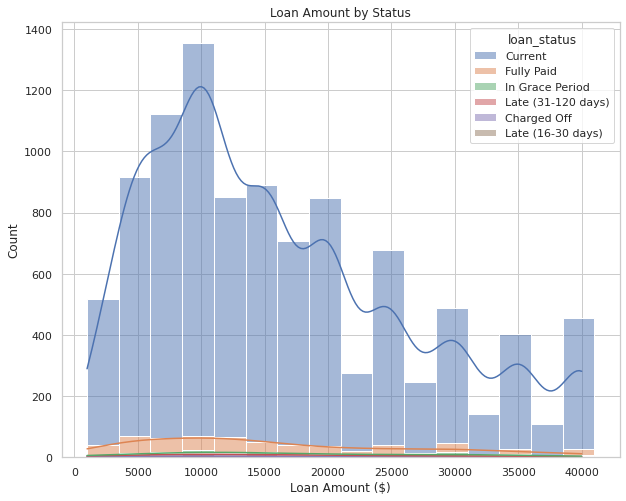

In [49]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=df, x='loan_amount', hue='loan_status', multiple='stack', ax=ax, kde=True, binwidth=2500)
plt.title('Loan Amount by Status')
plt.xlabel('Loan Amount ($)')
plt.show()

We see a rapid climb up to the peak at $10,000 then a slow tailing off to the maximum amount of $40,000. We can also see that an overwhelming majority of loans are current.

## Home Ownership and Interest Rates

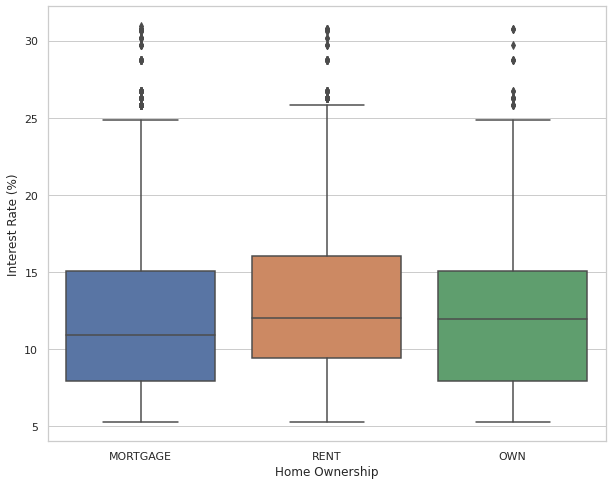

In [57]:
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='homeownership', y='interest_rate')
plt.xlabel('Home Ownership')
plt.ylabel('Interest Rate (%)')
plt.show()

It looks like renters have a slightly higher interest rate than home owners, but by a thin margin.

# States and Interest Rates

Text(0, 0.5, 'Loan Status')

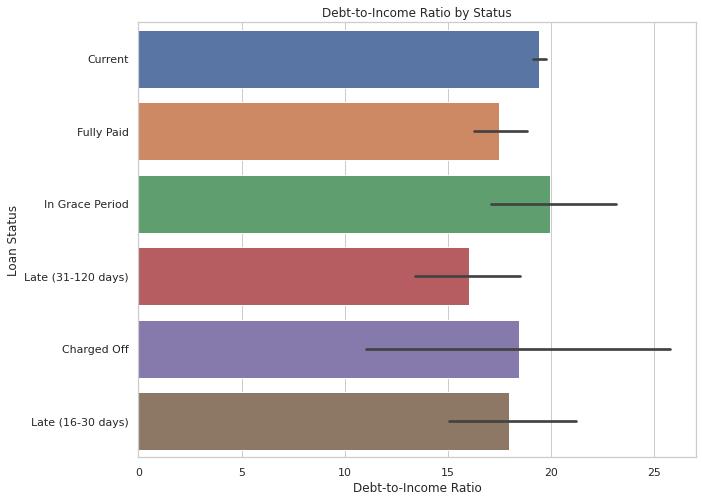

In [70]:
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df, x='debt_to_income', y='loan_status')
plt.title('Debt-to-Income Ratio by Status')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Loan Status')

# Predicting Interest Rate